In [11]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [12]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


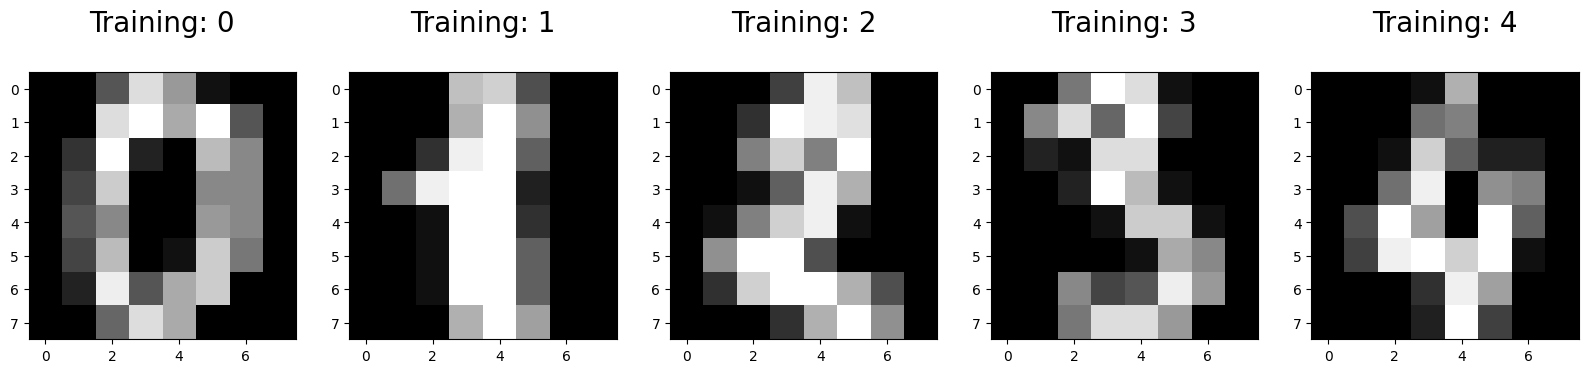

In [13]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Use the RandomForestClassifier to create a classification model.

In [14]:
# Assign X and y and check the shape of the data
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [15]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [16]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

Pick one parameter to tune, explain why you chose this parameter.

N_estimators - increasing the number of estimators will improve the accuracy of the model whilst also increasing the computational cost. I will evaluate at what point the number of estimators gives a high accuracy at a reasonably fast processing time.

In [17]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900],  # Number of trees
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_estimators': 700}
Best Score: 0.9770373596593108


Confusion matrix for the Random Forest model on the test set.

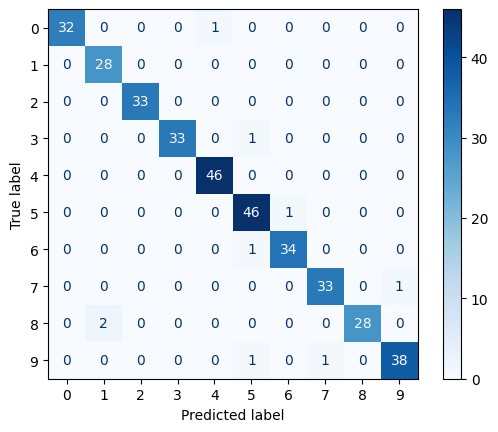

In [19]:
# Train the Random Forest model using the tuned n_estimator parameter
rf = RandomForestClassifier(n_estimators=700, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Report which classes the model struggles the most with:
The model appears to be very accurate, only making 1-3 false predicions. There were 3 false predictions for the label '5' which suggests this is the number this model struggles most with. There were two instances where the model predicted an '8' where the true label was '1' which may also suggest there is an issue here with correctly predicting a '1'.

Report the accuracy, precision, recall and f1-score. Use average='macro'.

In [21]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute precision (macro average)
precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision}')

# Compute recall (macro average)
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall}')

# Compute F1-score (macro average)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1-score: {f1}')


Accuracy: 0.975
Precision: 0.9767208028874398
Recall: 0.9744358749302429
F1-score: 0.9752347262579353


The outcomes of these scores are all very close to 1 which is the outcome we want from the model. It shows a very high level of accuracy, precision and recall.